### Regresión logística y k-Nearest Neighbors en el problema de clasificación

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Creamos datos artificialmente, con distribución normal

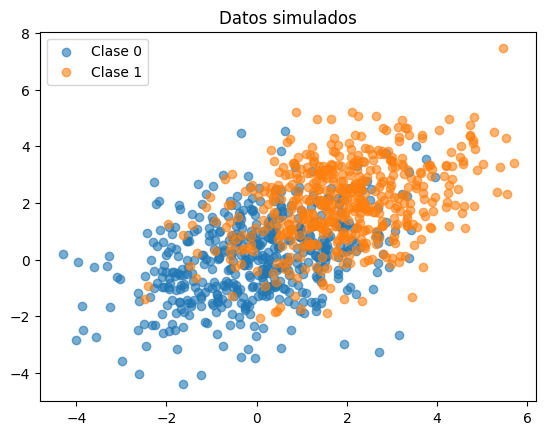

In [28]:
# Número de muestras por clase
n = 500

# Medias y covarianzas
mean_0 = [0, 0]
mean_1 = [2, 2]

cov = [[2, 0.7],
       [0.7, 2]]

# Generar datos
X0 = np.random.multivariate_normal(mean_0, cov, n)
X1 = np.random.multivariate_normal(mean_1, cov, n)

X = np.vstack((X0, X1))
y = np.hstack((np.zeros(n), np.ones(n)))

# Visualización
plt.scatter(X0[:, 0], X0[:, 1], label="Clase 0", alpha=0.6)
plt.scatter(X1[:, 0], X1[:, 1], label="Clase 1", alpha=0.6)
plt.legend()
plt.title("Datos simulados")
plt.show()


Separamos nuestros datos en conjunto de entrenamiento y prueba

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Escalamos nuestros datos

In [30]:
# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

acc_log = accuracy_score(y_test, y_pred_log)
print("Accuracy Regresión Logística:", acc_log)


Accuracy Regresión Logística: 0.8266666666666667


In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN:", acc_knn)


Accuracy KNN: 0.8266666666666667


Veamos estos resultados con una frontera de decisión

In [33]:
def plot_decision_boundary(model, X, y, ax, title):
    # Crear malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Frontera
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

    # Datos
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=20)
    ax.set_title(title)


Frontera de decisión de la regresión logística

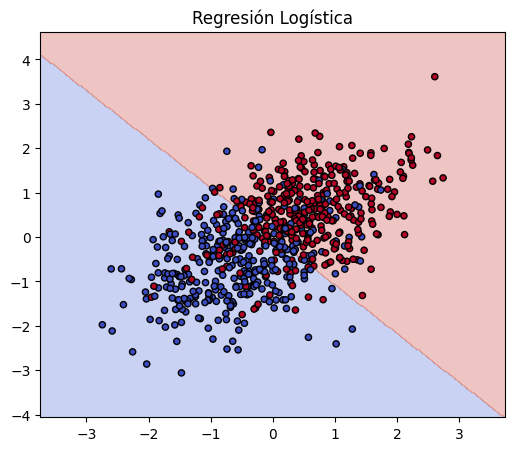

In [34]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_decision_boundary(
    log_reg,
    X_train_scaled,
    y_train,
    ax,
    title="Regresión Logística"
)

plt.show()


Frontera de decisión de k-Nearest Neighbors

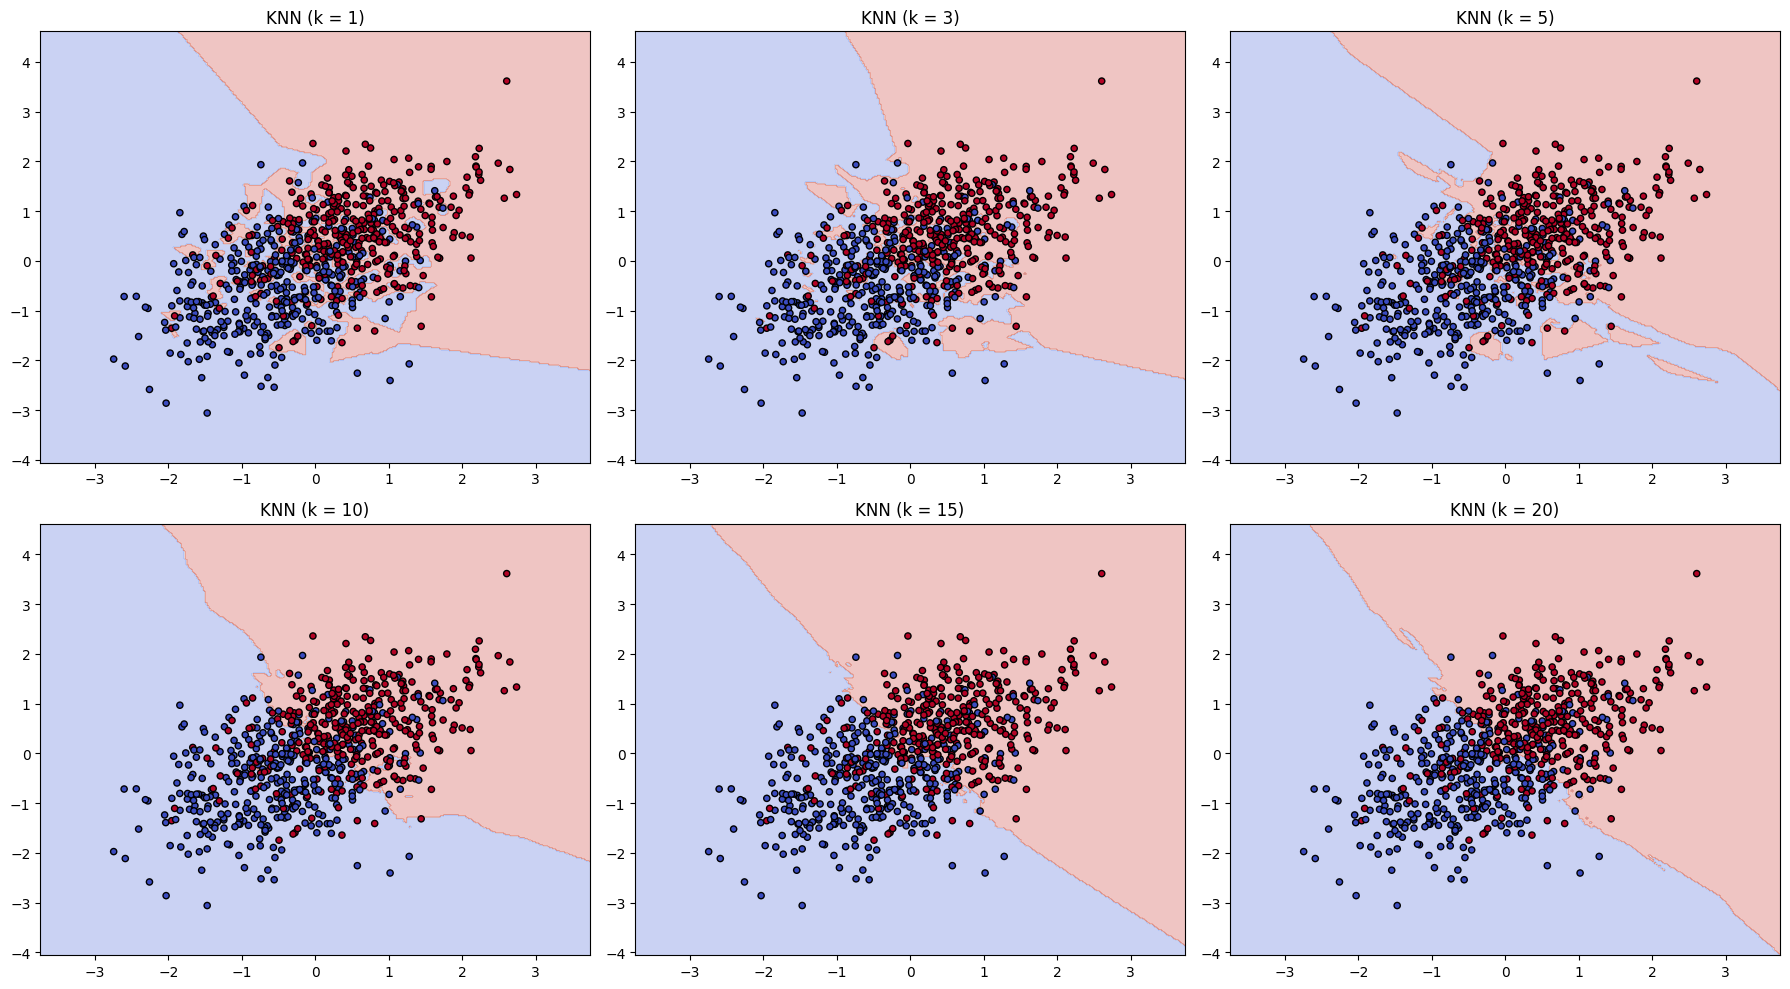

In [50]:
k_values = [1, 3, 5, 10, 15, 20]

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 10))

for i, k in enumerate(k_values):
    row = i // 3
    col = i % 3

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    plot_decision_boundary(
        knn,
        X_train_scaled,
        y_train,
        axes[row, col],
        title=f"KNN (k = {k})"
    )

plt.tight_layout()
plt.show()


Extensiones generales: clasifición multiclase

Generamos nuestros datos con cinco clases

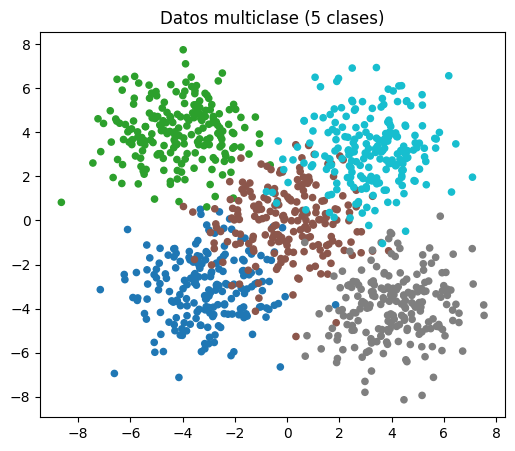

In [75]:
n_classes = 5
n_samples_per_class = 200

means = [
    [-3, -3],
    [-4,  4],
    [ 0,  0],
    [ 4, -4],
    [ 3,  3]
]

cov = [[2,0.2],
       [0.2, 2]]

X_list = []
y_list = []

for i, mean in enumerate(means):
    X_i = np.random.multivariate_normal(mean, cov, n_samples_per_class)
    y_i = np.full(n_samples_per_class, i)

    X_list.append(X_i)
    y_list.append(y_i)

X = np.vstack(X_list)
y = np.hstack(y_list)

# Visualización inicial
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", s=20)
plt.title("Datos multiclase (5 clases)")
plt.show()


Dividimos nuestro conjunto de datos en dos: entrenamiento y prueba

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Inicializamos un algoritmo de k-Nearest Neighbors con k = 7

In [77]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

Evaluamos nuestro modelo

In [78]:
y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nMatriz de confusión:\n", cm)

Accuracy: 0.9

Matriz de confusión:
 [[55  0  4  1  0]
 [ 0 60  0  0  0]
 [ 9  0 44  3  4]
 [ 0  0  0 59  1]
 [ 0  0  7  1 52]]


In [79]:
def plot_decision_boundary_multiclass(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.35, cmap="tab10")
    scatter = ax.scatter(
        X[:, 0], X[:, 1], c=y, cmap="tab10",
        edgecolor="k", s=20
    )
    ax.set_title(title)


Visualización de frontera de decisión

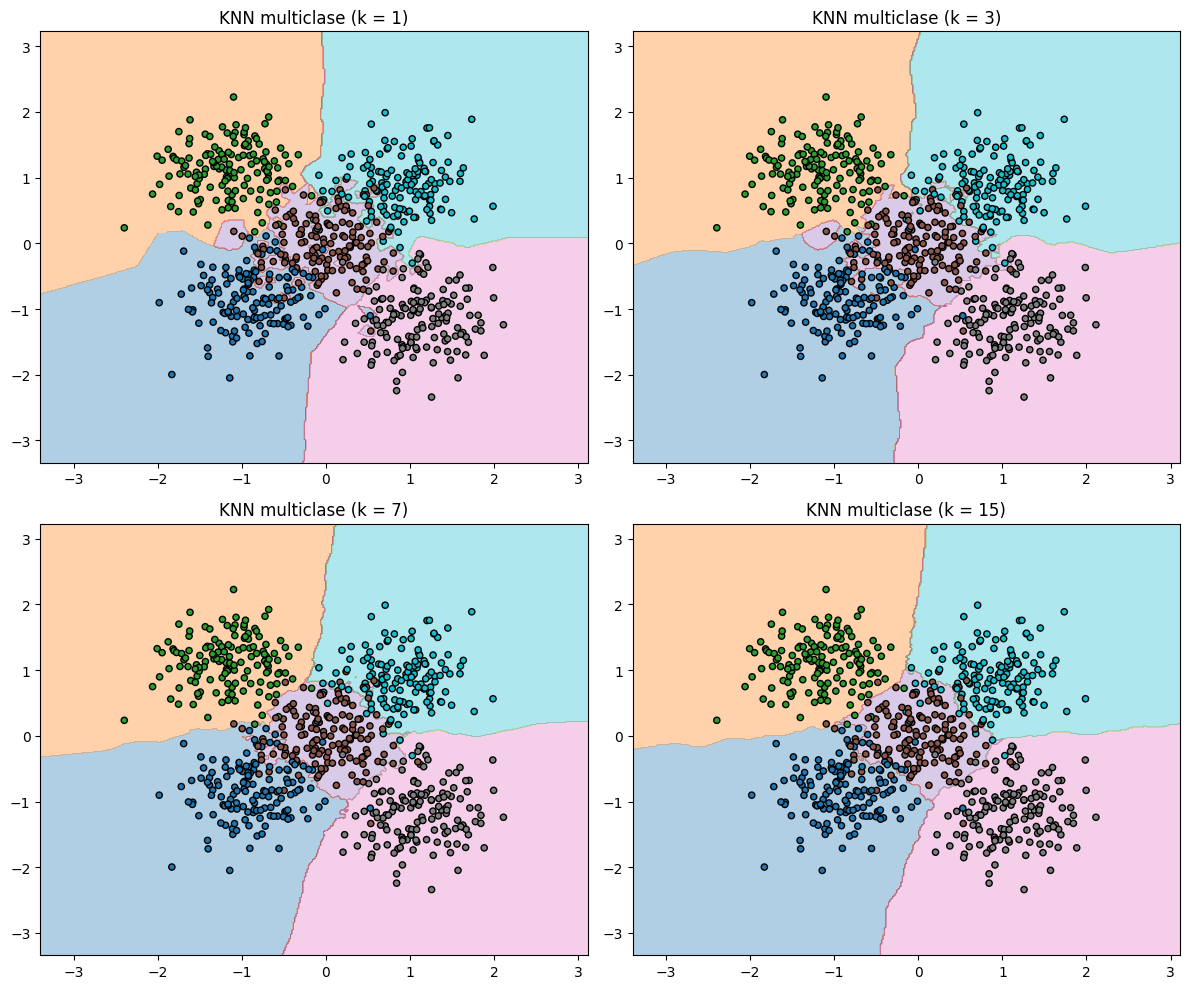

In [80]:
k_values = [1, 3, 7, 15]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    plot_decision_boundary_multiclass(
        knn,
        X_train_scaled,
        y_train,
        axes[i],
        title=f"KNN multiclase (k = {k})"
    )

plt.tight_layout()
plt.show()
